<a href="https://colab.research.google.com/github/Ujanghost/SOM/blob/main/SOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install minisom


  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.2-py3-none-any.whl size=10650 sha256=41c8a07c20ca6f3dfaeef2b6351315050002288e7a691c1e1b5bfad99dfea129
  Stored in directory: /root/.cache/pip/wheels/b4/f6/8a/9daf8831901c3e3805775633404248f10663d1c80b7e5a1314
Successfully built minisom


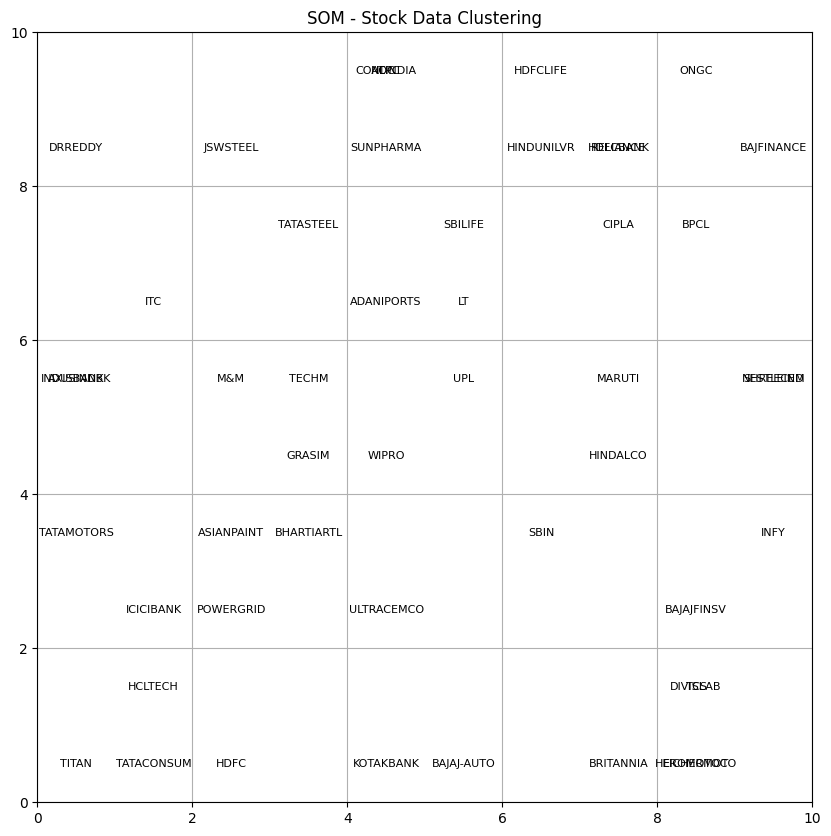

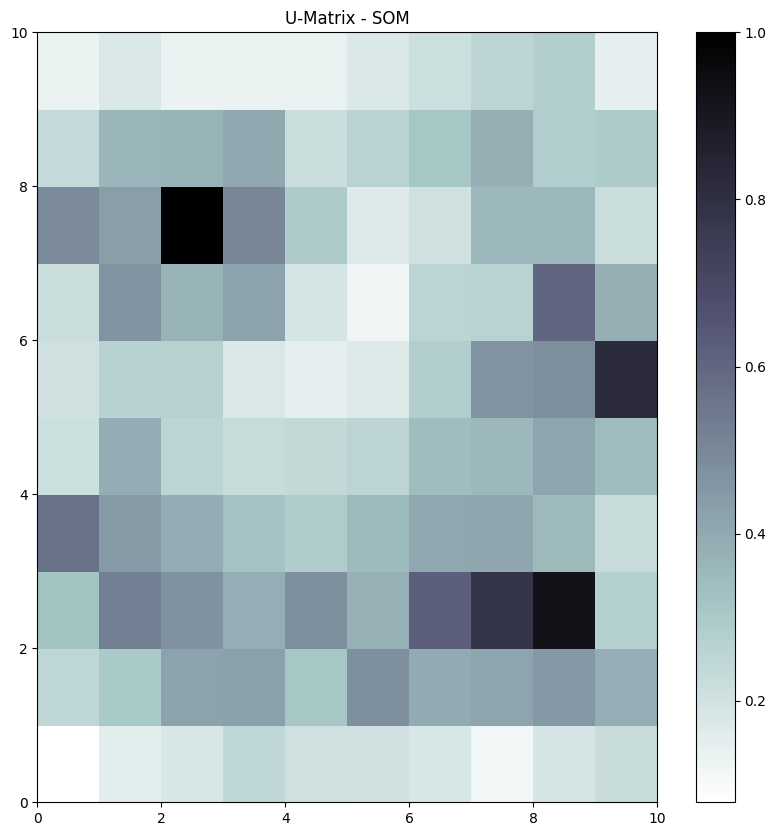

        Symbol Cluster
0   ADANIPORTS     4,6
1   ASIANPAINT     2,3
2     AXISBANK     0,5
3   BAJAJ-AUTO     5,0
4   BAJAJFINSV     8,2
5   BAJFINANCE     9,8
6   BHARTIARTL     3,3
7         BPCL     8,7
8    BRITANNIA     7,0
9        CIPLA     7,7
10   COALINDIA     4,9
11    DIVISLAB     8,1
12     DRREDDY     0,8
13   EICHERMOT     8,0
14      GRASIM     3,4
15     HCLTECH     1,1
16        HDFC     2,0
17    HDFCBANK     7,8
18    HDFCLIFE     6,9
19  HEROMOTOCO     8,0
20    HINDALCO     7,4
21  HINDUNILVR     6,8
22   ICICIBANK     1,2
23  INDUSINDBK     0,5
24        INFY     9,3
25         IOC     4,9
26         ITC     1,6
27    JSWSTEEL     2,8
28   KOTAKBANK     4,0
29          LT     5,6
30         M&M     2,5
31      MARUTI     7,5
32   NESTLEIND     9,5
33        NTPC     4,9
34        ONGC     8,9
35   POWERGRID     2,2
36    RELIANCE     7,8
37     SBILIFE     5,7
38        SBIN     6,3
39    SHREECEM     9,5
40   SUNPHARMA     4,8
41  TATACONSUM     1,0
42  TATAMOT

In [7]:
import numpy as np
import pandas as pd
from minisom import MiniSom
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Load the dataset
data = pd.read_csv('/content/stock_data.csv')

# Remove commas from numerical columns and convert to floats
for column in ['Open', 'High', 'Low', 'LTP', 'Volume (lacs)', 'Turnover (crs.)', '52w H', '52w L', '365 d % chng', '30 d % chng']:
    data[column] = data[column].replace({',': ''}, regex=True).astype(float)

# Feature engineering
features = ['Open', 'High', 'Low', 'LTP', 'Volume (lacs)', 'Turnover (crs.)', '52w H', '52w L', '365 d % chng', '30 d % chng']
data_features = data[features]

# Normalize the data
scaler = MinMaxScaler()
data_features_normalized = scaler.fit_transform(data_features)

# Initialize and train the SOM
som_shape = (10, 10)  # 10x10 grid
som = MiniSom(som_shape[0], som_shape[1], data_features_normalized.shape[1], sigma=1.0, learning_rate=0.5)
som.random_weights_init(data_features_normalized)
som.train_random(data_features_normalized, 100)  # Train with 100 iterations

# Plot the SOM
plt.figure(figsize=(10, 10))
for i, x in enumerate(data_features_normalized):
    w = som.winner(x)
    plt.text(w[0] + 0.5, w[1] + 0.5, data['Symbol'][i], fontsize=8, ha='center', va='center')

# Plotting the map with the number of hits (how many times each neuron is the winner)
plt.title('SOM - Stock Data Clustering')
plt.xlim([0, som_shape[0]])
plt.ylim([0, som_shape[1]])
plt.grid()
plt.show()

# Create a U-Matrix to show the distances between the neurons
u_matrix = som.distance_map().T

# Plot the U-Matrix
plt.figure(figsize=(10, 10))
plt.pcolor(u_matrix, cmap='bone_r')
plt.colorbar()
plt.title('U-Matrix - SOM')
plt.show()

# Predict cluster for each stock
clusters = np.array([som.winner(x) for x in data_features_normalized])
cluster_labels = np.apply_along_axis(lambda x: f"{x[0]},{x[1]}", 1, clusters)
data['Cluster'] = cluster_labels

# Display cluster assignment
print(data[['Symbol', 'Cluster']])

# Convert cluster labels to integers for silhouette and Davies-Bouldin score calculations
cluster_int_labels = np.array([x[0] * som_shape[1] + x[1] for x in clusters])

# Calculate Silhouette Score
sil_score = silhouette_score(data_features_normalized, cluster_int_labels)
print(f'Silhouette Score: {sil_score}')

# Calculate Davies-Bouldin Index
db_score = davies_bouldin_score(data_features_normalized, cluster_int_labels)
print(f'Davies-Bouldin Index: {db_score}')
